# Crime and public infrastructure in coastal US cities
### To what extent do elements of the urban fabric influence crime rates in major US cities?


## Part 2: Data Visualization

In [7]:
#let's start by setting our directory and importing relevant packages
setwd("C:/Users/Leonardo/Documents/TU_Delft/EPA_Year1/EPA1315/FinalProject")
install.packages(c('fitdistrplus', 'logspline'))
#Libraries required For this project
library(fitdistrplus)
library(logspline)
library(rgdal)
library(ggplot2)
library(wesanderson)
library(RColorBrewer)
library(sf)
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(rgeos)
library(tidyverse)
library(lwgeom)
library(stringr)
library(dplyr)

Loading required package: sp
rgdal: version: 1.4-4, (SVN revision 833)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/Leonardo/Documents/R/win-library/3.6/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/Leonardo/Documents/R/win-library/3.6/rgdal/proj
 Linking to sp version: 1.3-1 
Linking to GEOS 3.6.1, GDAL 2.2.3, PROJ 4.9.3
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
rgeos version: 0.5-2, (SVN revision 621)
 GEOS runtime version: 3.6.1-CAPI-1.10.1 
 Linking to sp version: 1.3-1 
 Polygon checking: TRUE 

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.3     v purrr   0.3.2
v tidyr   1.0.0     v dplyr   0.8.3
v readr   1.

In [8]:
#read files
SF_LA_PH_DC_prcnts_vars <- read.csv('Data/AllCities/Tables/SF_LA_PH_DC_prcnts_vars.csv')
SF_prcnts_vars <- read.csv('Data/AllCities/Tables/SF_prcnts_vars.csv')
LA_prcnts_vars <- read.csv('Data/AllCities/Tables/LA_prcnts_vars.csv')
PH_prcnts_vars <- read.csv('Data/AllCities/Tables/PH_prcnts_vars.csv')
DC_prcnts_vars <- read.csv('Data/AllCities/Tables/DC_prcnts_vars.csv')

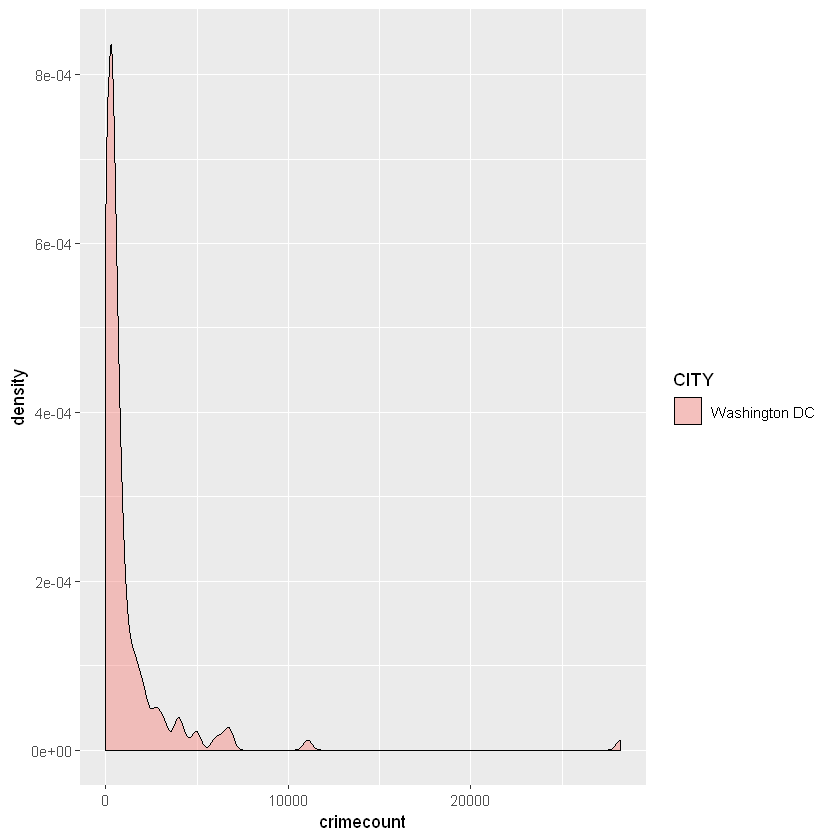

In [40]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$CITY == ' ')) + 
    geom_density(aes(x=crimecount, fill=CITY), alpha = 0.4)

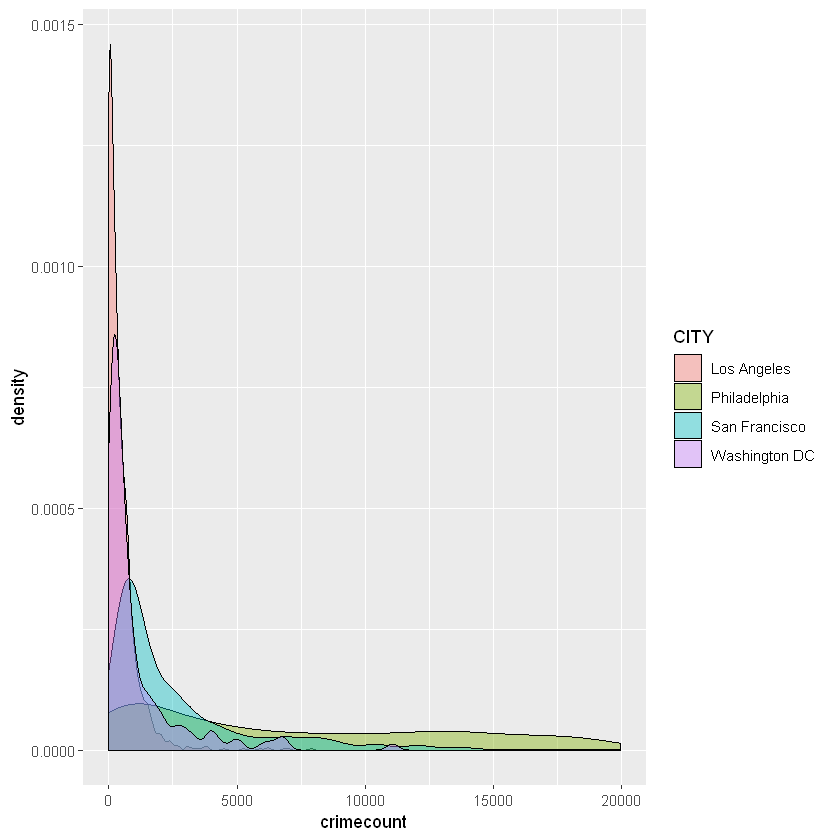

In [9]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$crimecount < 20000)) + 
    geom_density(aes(x=crimecount, fill=CITY), alpha = 0.4)

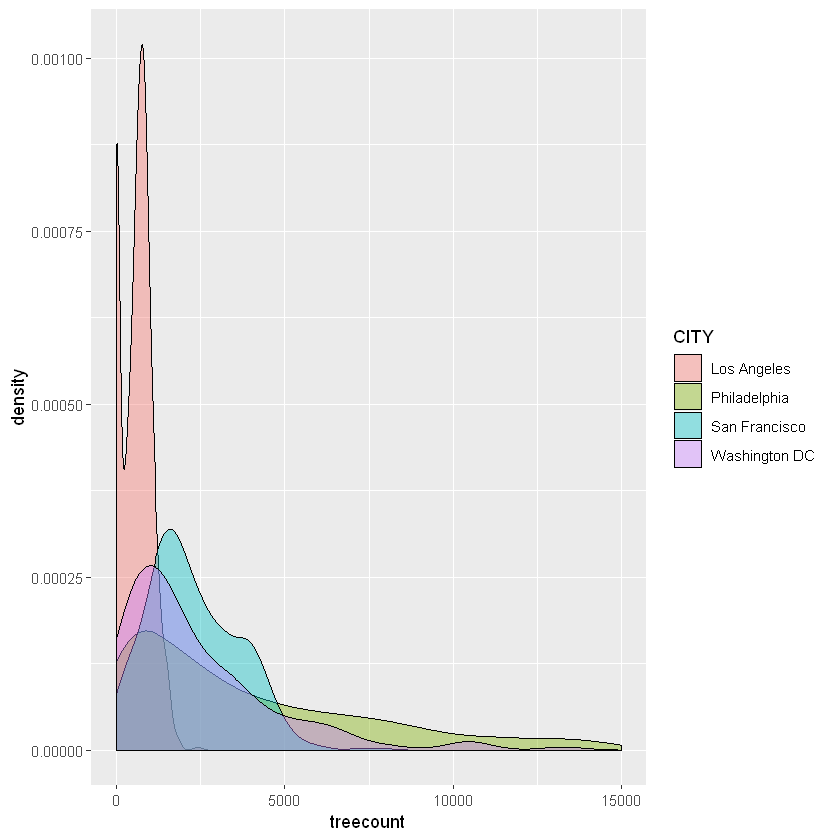

In [10]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$treecount < 15000)) + 
    geom_density(aes(x=treecount, fill=CITY), alpha = 0.4)

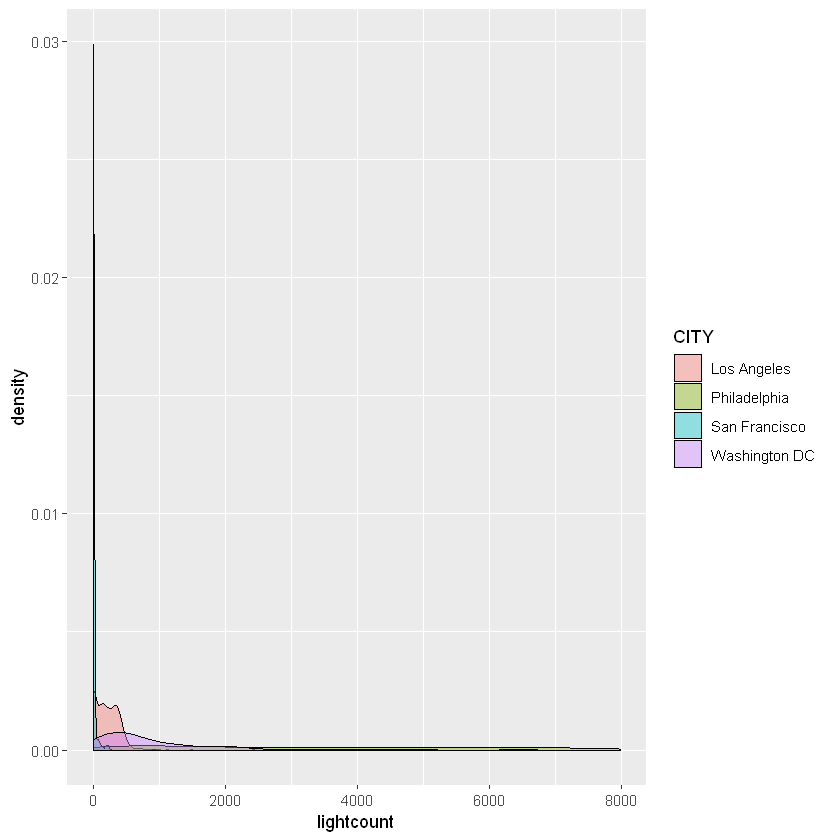

In [34]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$lightcount < 8000)) + 
    geom_density(aes(x=lightcount, fill=CITY), alpha = 0.4)

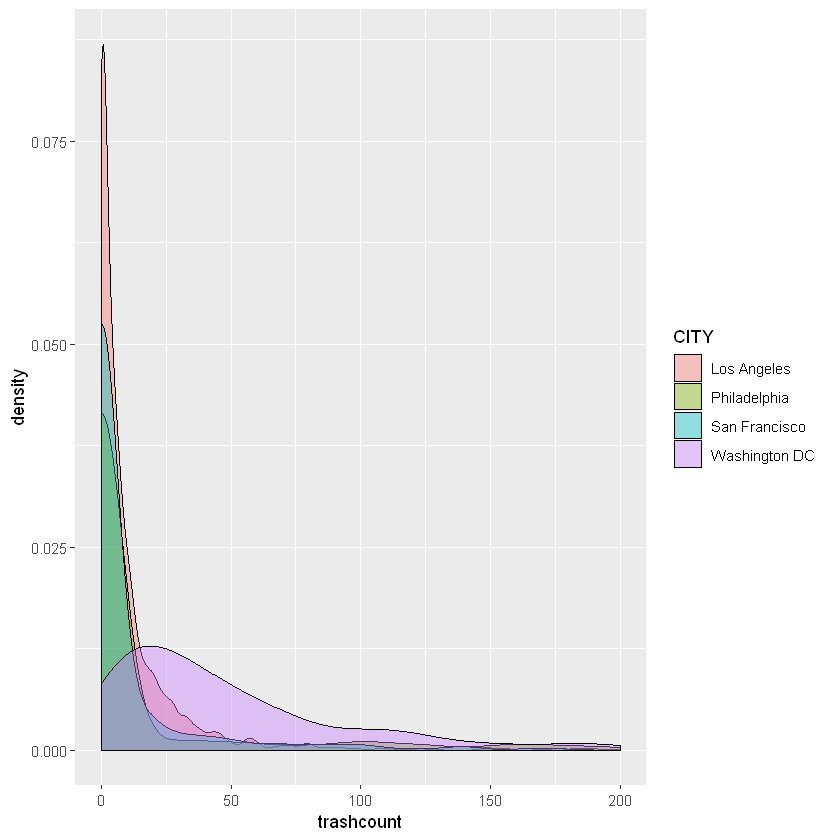

In [12]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$trashcount < 200)) + 
    geom_density(aes(x=trashcount, fill=CITY), alpha = 0.4)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


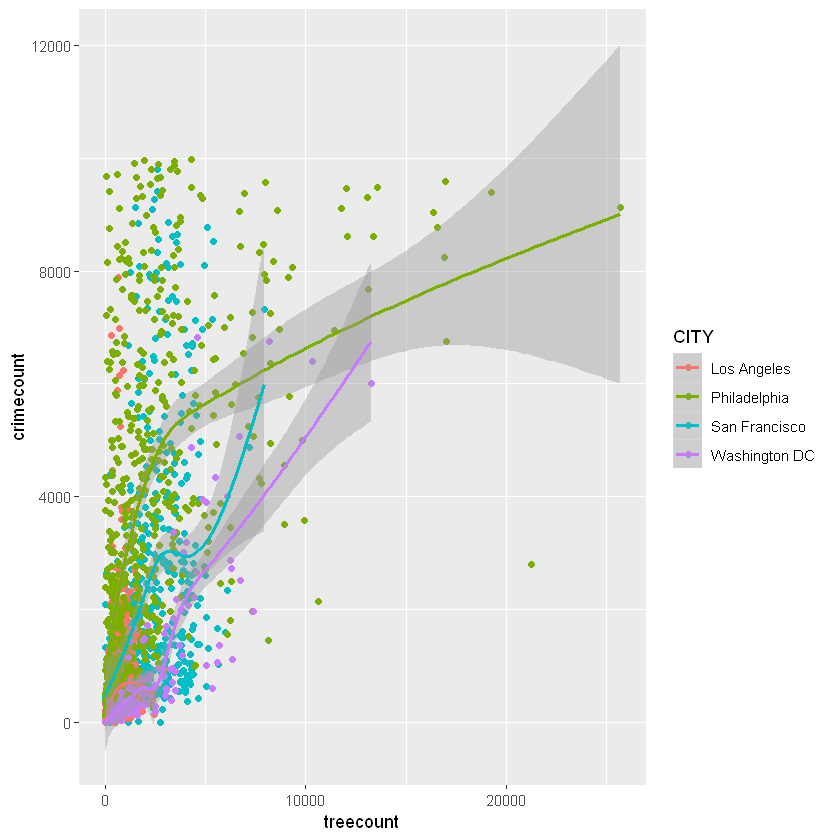

In [16]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$crimecount < 10000), 
       aes(x=treecount, y=crimecount, color=CITY), alpha=0.7) +
  geom_point() +
  geom_smooth()

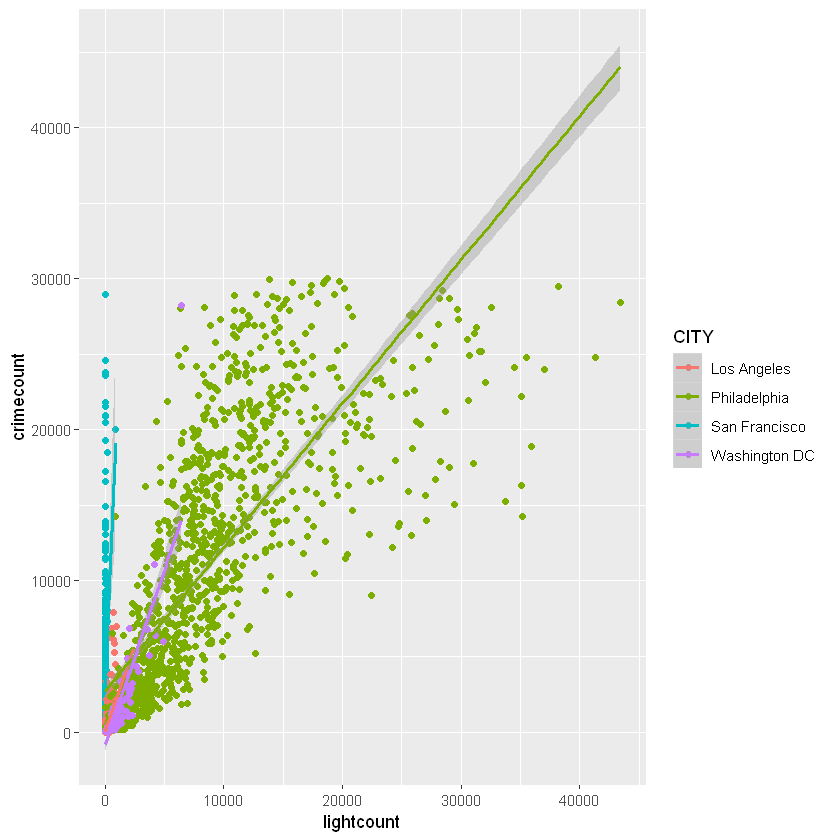

In [23]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$crimecount < 30000), 
       aes(x=lightcount, y=crimecount, color=CITY), alpha=0.7) +
  geom_point() +
  geom_smooth(method=lm)

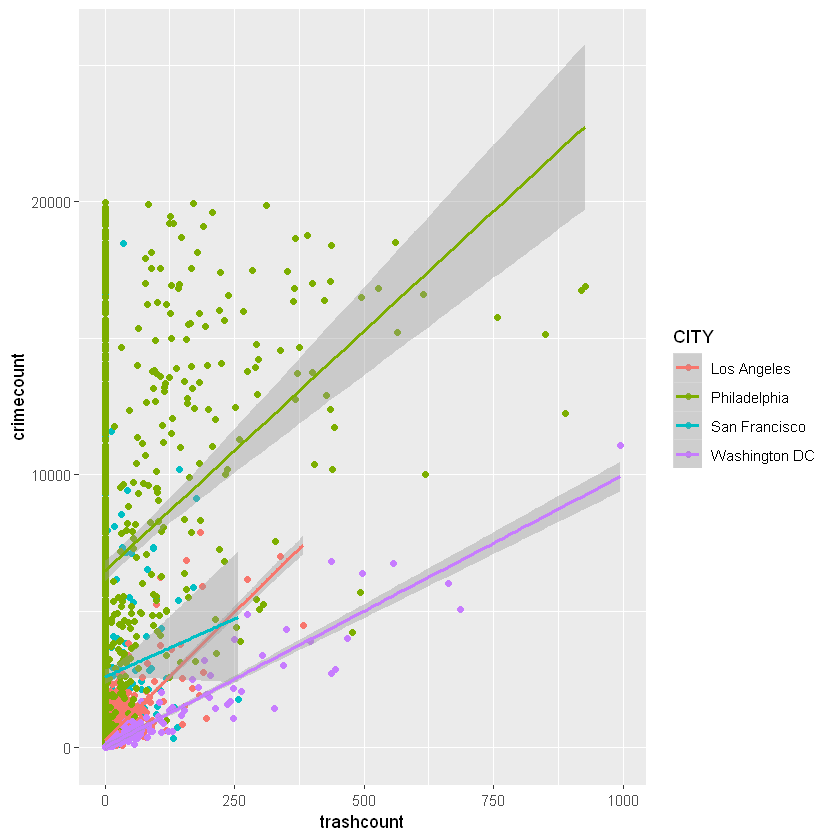

In [24]:
ggplot(subset(SF_LA_PH_DC_prcnts_vars, SF_LA_PH_DC_prcnts_vars$crimecount < 20000), 
       aes(x=trashcount, y=crimecount, color=CITY), alpha=0.7) +
  geom_point() +
  geom_smooth(method=lm)

summary statistics
------
min:  0   max:  19968.22 
median:  731.1292 
mean:  2957.875 
estimated sd:  4712.843 
estimated skewness:  1.979668 
estimated kurtosis:  5.901474 

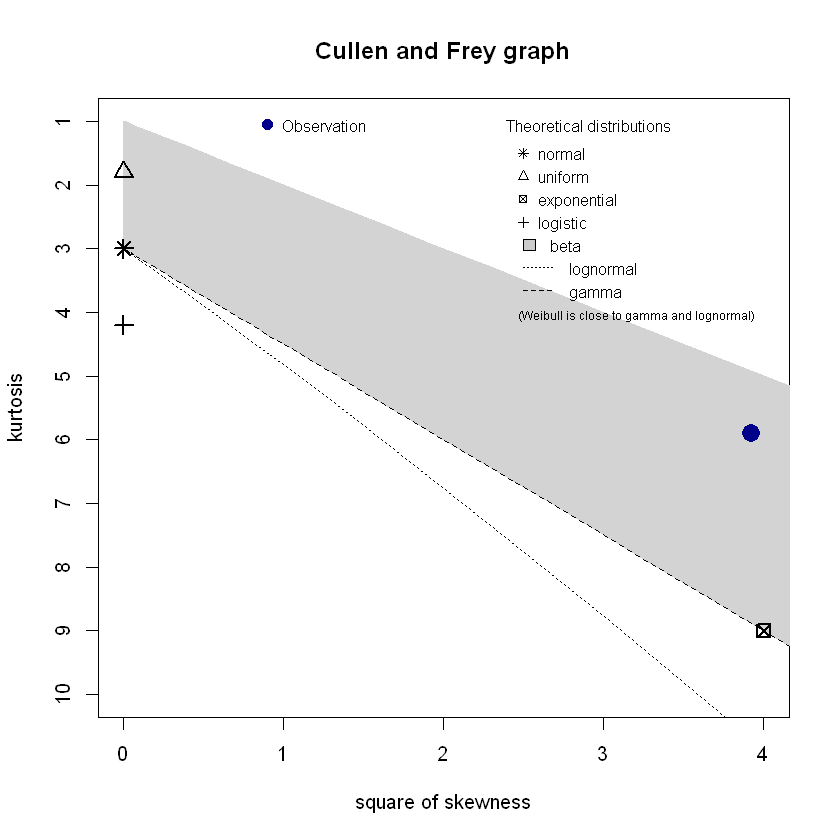

In [32]:
descdist(SF_LA_PH_DC_prcnts_vars$crimecount, discrete = FALSE)